# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

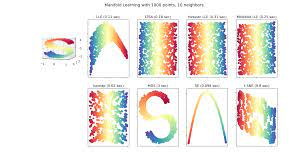

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1541/3091135299.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
# s자 형태의 커브 data를 생성
s_curve, color = datasets.make_s_curve(1000, random_state=0) 

In [3]:
digits, labels = datasets.load_digits(return_X_y=True)
random_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = random_proj.fit_transform(digits)

In [4]:
def min_max_scale(x) :
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x

In [5]:
def plot_s_curve(s_curve, color, position, projection) :
    s_curve = min_max_scale(s_curve)
    if projection == '3d' : # 3차원이면
        ax = plt.subplot(position, projection=projection)
        ax.scatter(s_curve[:,0], s_curve[:, 1], s_curve[:, 2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection == '2d' : # 2차원이면
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c=color, cmap=plt.cm.Spectral)

In [6]:
def plot_digits(digits, labels, position, projection) :
    digits = min_max_scale(digits)
    if projection == '3d' :
        ax = plt.subplot(position, projection=projection)
        for i in range(digits.shape[0]) :
            ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]), 
                    color=plt.cm.Set1(labels[i]/10.0), fontdict={'weight':'bold', 'size':9})
        
        ax.view_init(4, -72)
    elif projection == '2d' :
        ax = plt.subplot(position)
        for i in range(digits.shape[0]) :
            ax.text(digits[i, 0], digits[i, 1], str(labels[i]), 
                    color=plt.cm.Set1(labels[i]/10.0), fontdict={'weight':'bold', 'size':9})

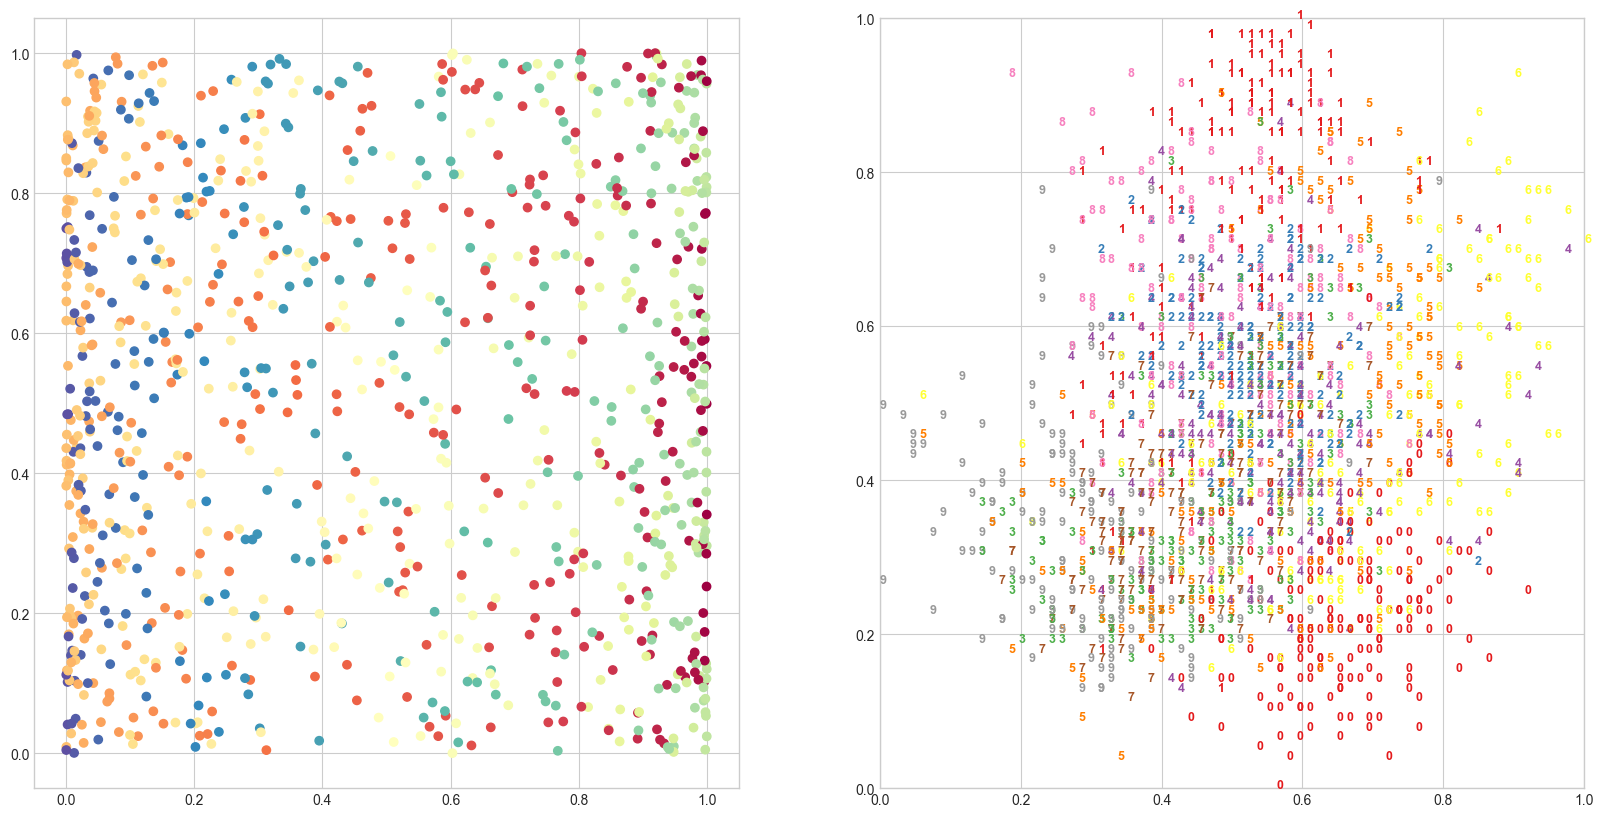

In [9]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, color, 121, '2d')
plot_digits(projected_digits, labels, 122, '2d')

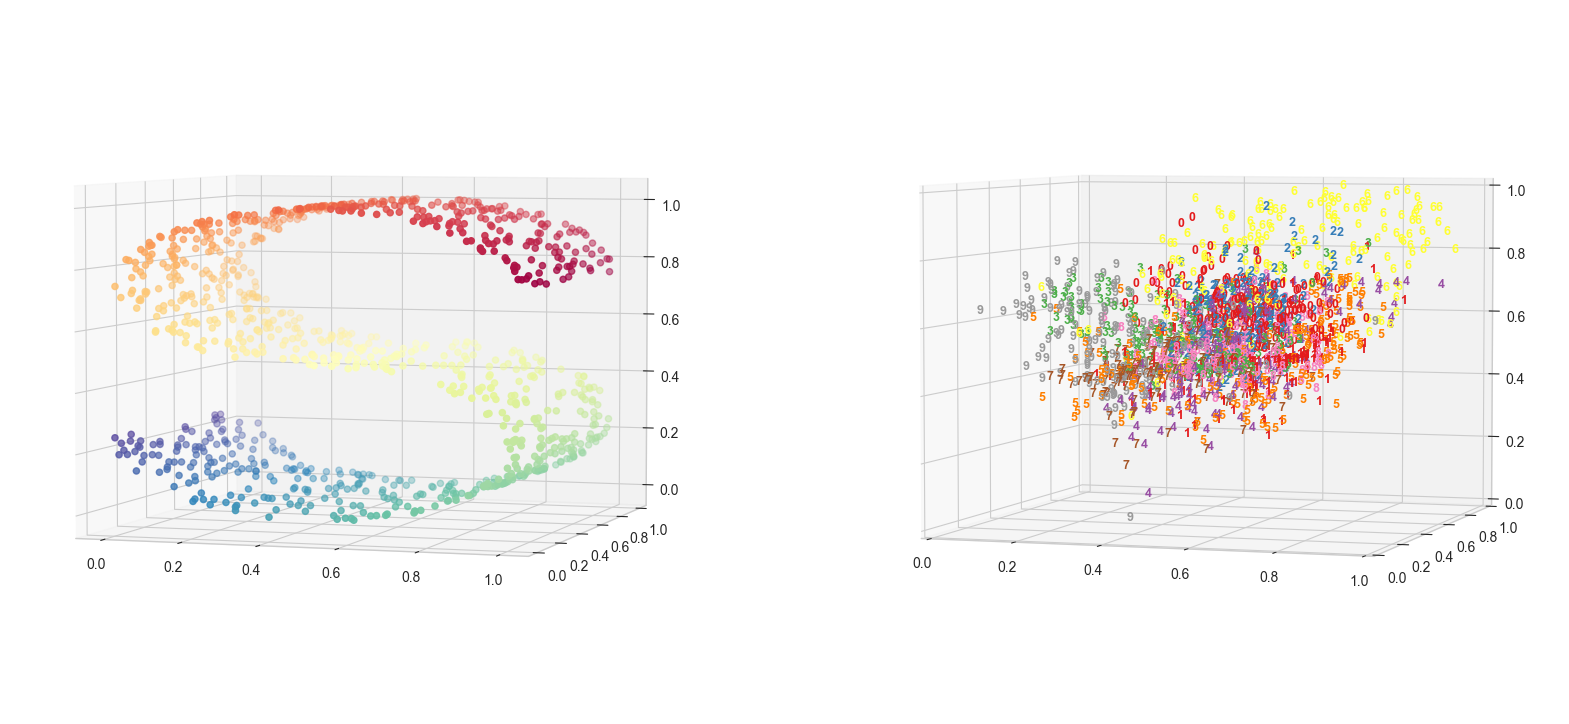

In [8]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve, color, 121, '3d')
plot_digits(projected_digits, labels, 122, '3d')


차원을 축소하며 data 손실을 최소화하는 방법들

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음 (근접한 이웃거리를 보존하면서 저차원으로 축소하는 방식)

In [14]:
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='standard', random_state=0).fit_transform(s_curve)

digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='standard', random_state=0).fit_transform(digits)                                 

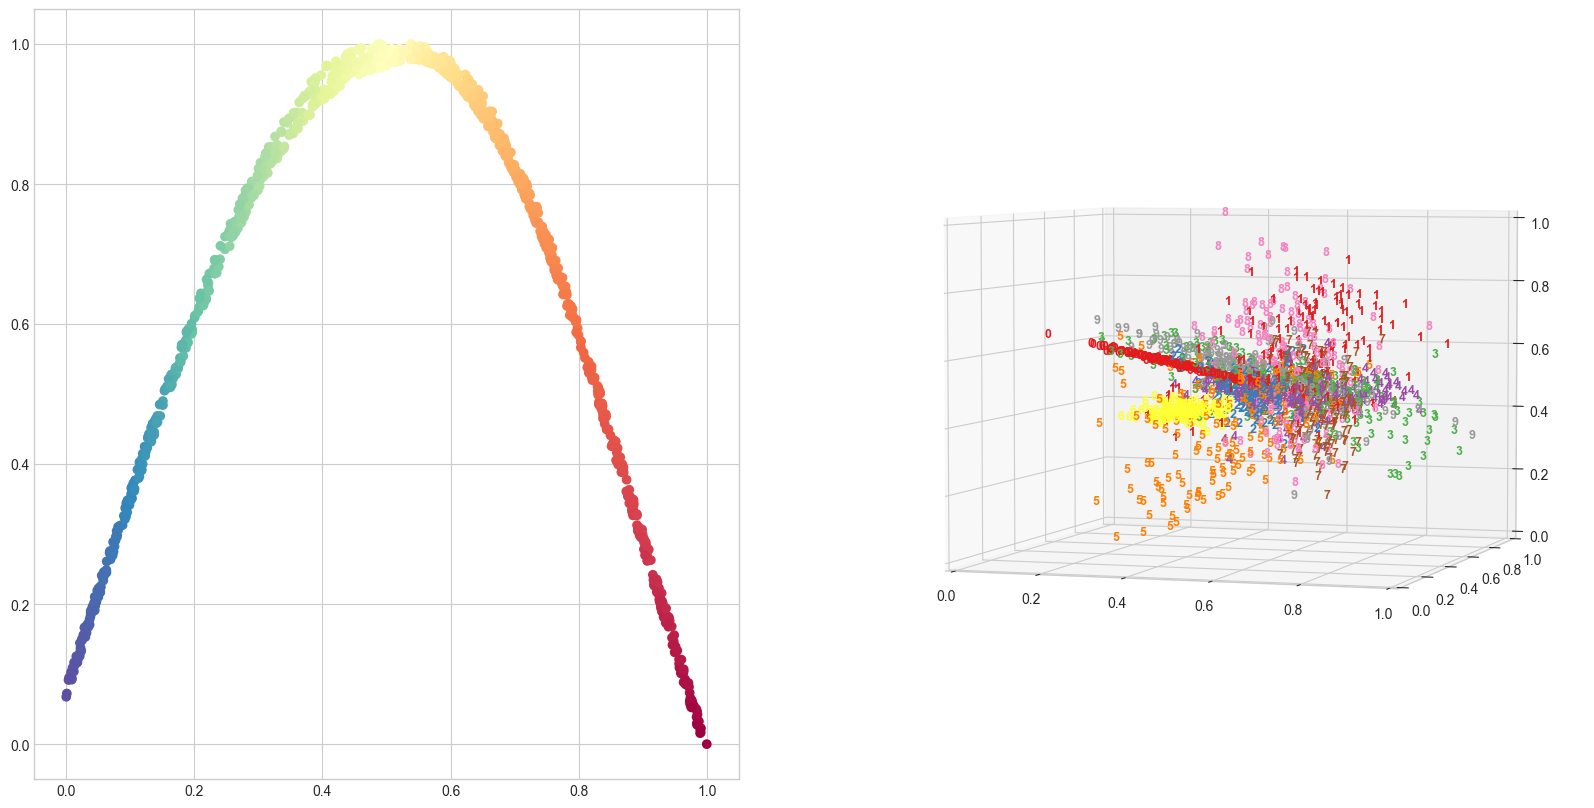

In [15]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_lle, color, 121, '2d') # 2d로 했는데도 S자 자체가 뭉개지지 않고 근접한 것들끼리 유지하면서 저차원 변환됐다
plot_digits(digits_lle, labels, 122, '3d')  # 근접한 것들끼리 3차원 공간에 뿌려져 있다.

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [16]:
# method='ltsa' 
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='ltsa', random_state=0).fit_transform(s_curve)

digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='ltsa', random_state=0).fit_transform(digits)                                 

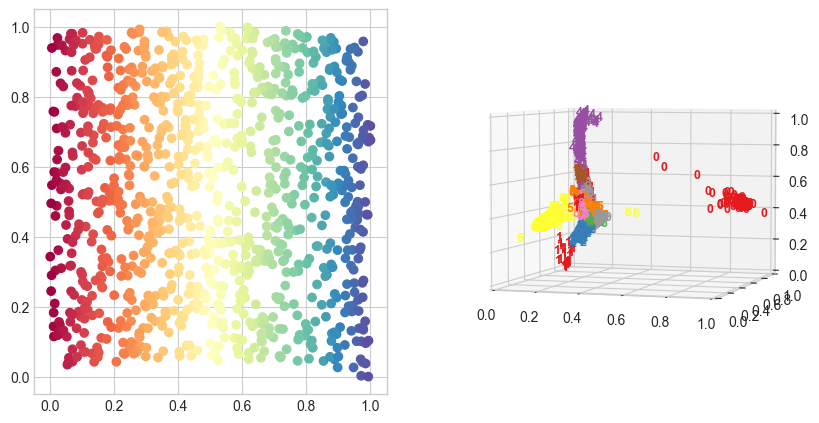

In [18]:
fig = plt.figure(figsize=(10, 5))
plot_s_curve(s_curve_ltsa, color, 121, '2d') # S자를 펼쳐서 공간 안에 embedding
plot_digits(digits_ltsa, labels, 122, '3d')  # 숫자 간의 특성이 유지한 채로 embedding

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법 (LLE는 단순히 이웃 간의 거리를 기반으로 유지한다는 제한점)
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [19]:
# method='hessian' 
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='hessian', random_state=0).fit_transform(s_curve)

digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='hessian', random_state=0).fit_transform(digits)                                 

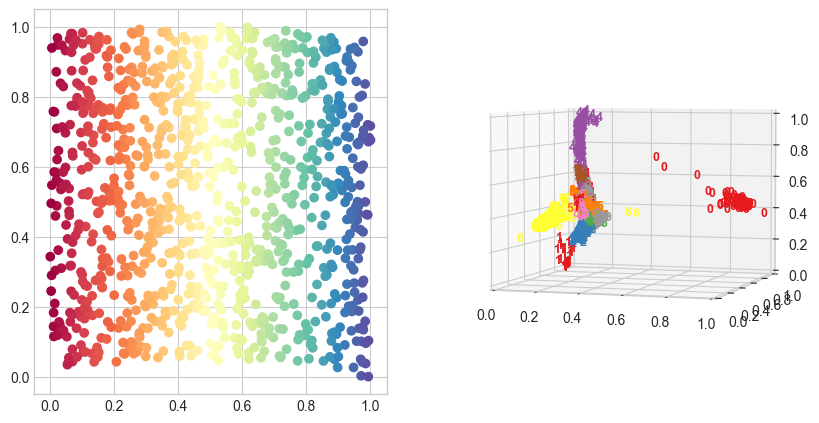

In [20]:
fig = plt.figure(figsize=(10, 5))
plot_s_curve(s_curve_hlle, color, 121, '2d') 
plot_digits(digits_hlle, labels, 122, '3d') 

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [21]:
# method='hessian' 
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2,
                                              method='modified', random_state=0).fit_transform(s_curve)

digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='modified', random_state=0).fit_transform(digits)                                 

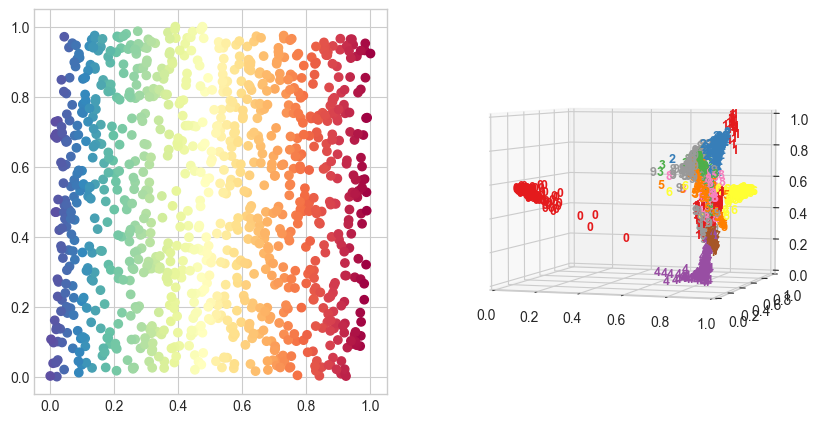

In [23]:
fig = plt.figure(figsize=(10, 5))
plot_s_curve(s_curve_mlle, color, 121, '2d') 
plot_digits(digits_mlle, labels, 122, '3d')  

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [24]:
# method='hessian' 
s_curve_isomap = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(s_curve)

digits_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(digits)                                 

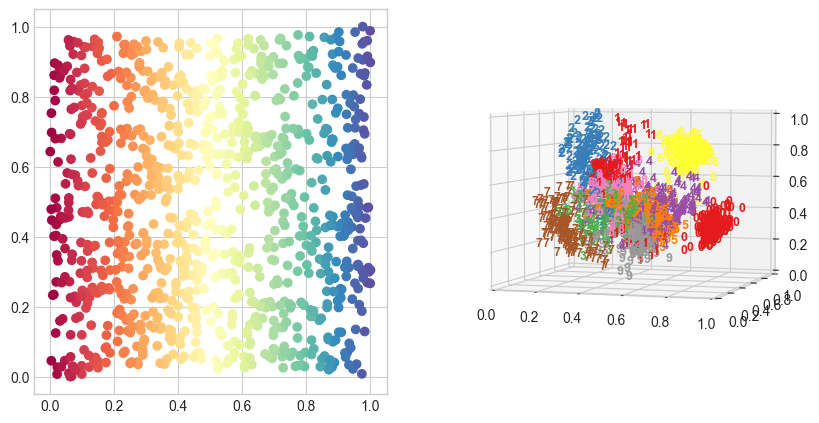

In [25]:
fig = plt.figure(figsize=(10, 5))
plot_s_curve(s_curve_isomap, color, 121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')  # 측지 간의 거리를 유지하며 저차원 embedding

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [26]:
# method='hessian' 
s_curve_mds = manifold.MDS(n_components=2,random_state=0).fit_transform(s_curve)

digits_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(digits)                                 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


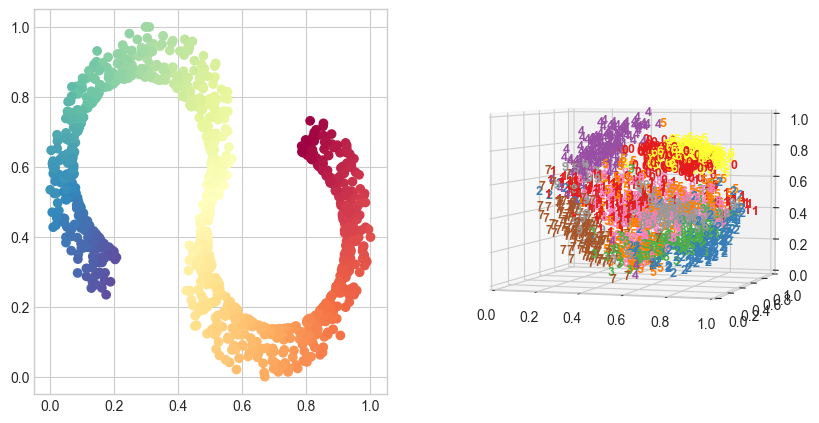

In [27]:
fig = plt.figure(figsize=(10, 5))
plot_s_curve(s_curve_mds, color, 121, '2d')
plot_digits(digits_mds, labels, 122, '3d') 

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [28]:
# method='hessian' 
s_curve_se = manifold.SpectralEmbedding(n_components=2,random_state=0).fit_transform(s_curve)

digits_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(digits)                                 

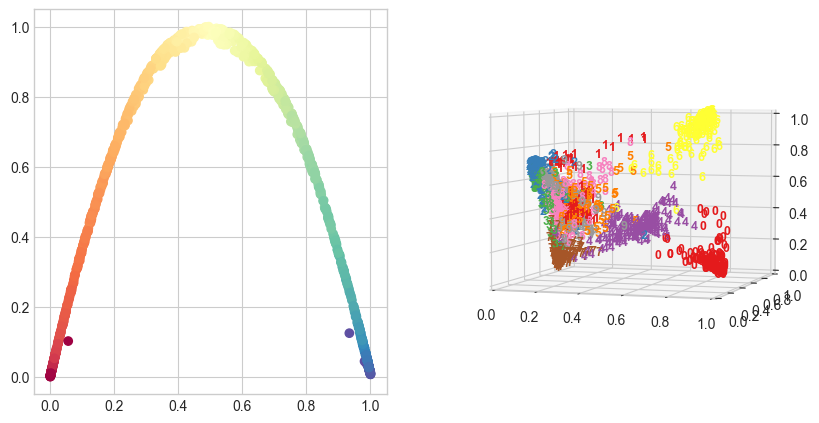

In [29]:
fig = plt.figure(figsize=(10, 5))
plot_s_curve(s_curve_se, color, 121, '2d')
plot_digits(digits_se, labels, 122, '3d') 

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* `데이터 포인트의 유사성을 확률로 변환`
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [30]:
# method='hessian' 
s_curve_tsne = manifold.TSNE(n_components=2,random_state=0).fit_transform(s_curve)

digits_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(digits)                                 

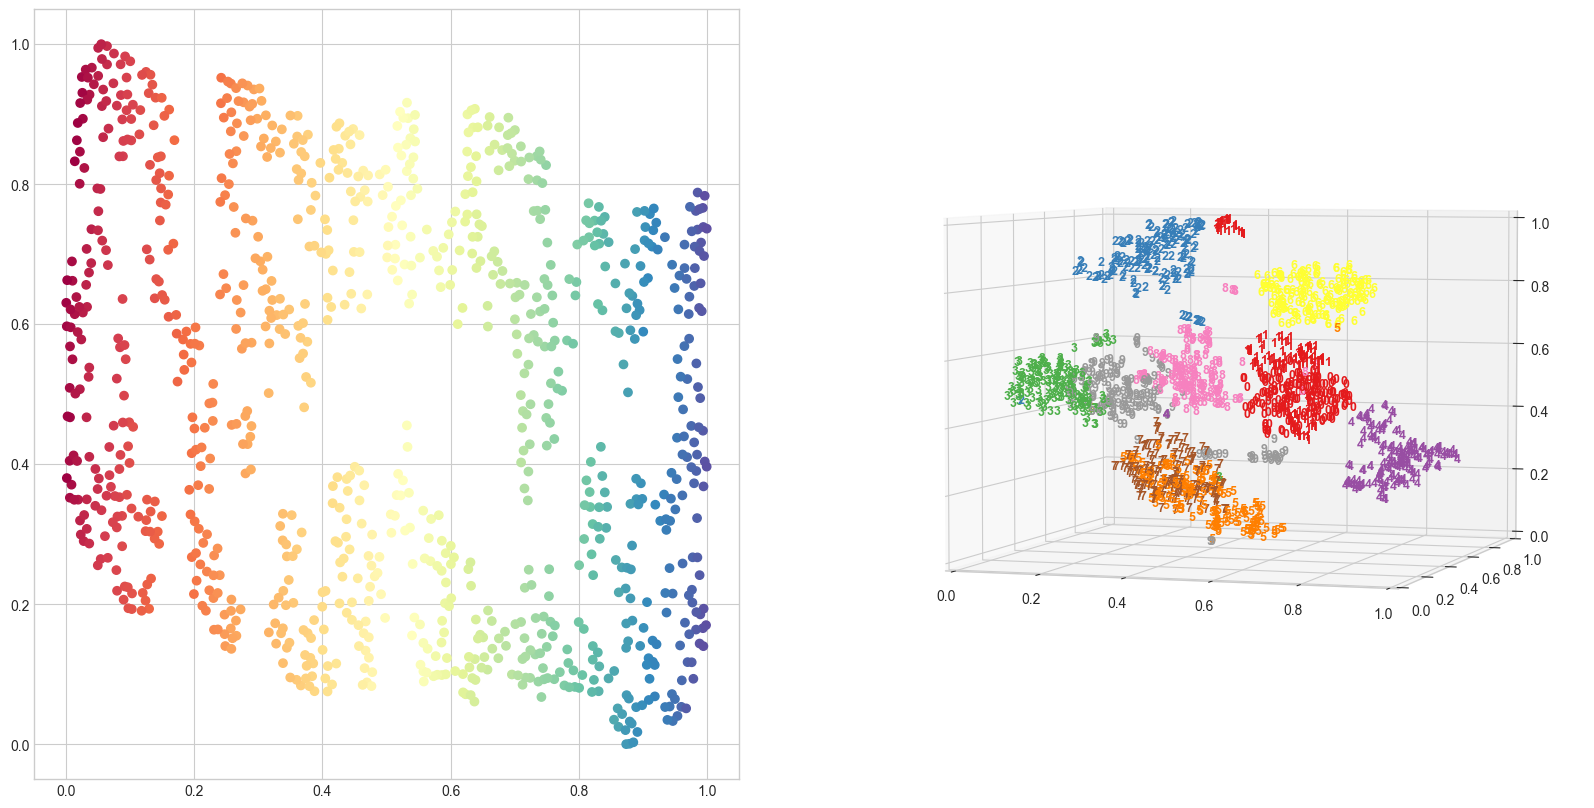

In [32]:
fig = plt.figure(figsize=(20, 10))
plot_s_curve(s_curve_tsne, color, 121, '2d') 
plot_digits(digits_tsne, labels, 122, '3d') 
# 국소 구조로 나타나 있음

## 정제된 표현을 이용한 학습

시각화를 통해서 저차원 변환을 살펴봤는데,
Manifold Learning에 대한 결과(=저차원 변환) 자체는 정제된 데이터라고 생각할 수도 있다.(preprocessing) <br>
이러한 결과를 다른 학습의 input으로 사용할 수 있다.

`==> Manifold Learning의 결과를 다른 model의 input으로 사용!`

* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [34]:
raw_digits, target = datasets.load_digits(return_X_y=True)

In [35]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

### 원본 데이터를 사용할 때

#### KNN

In [58]:
score = cross_val_score(
    estimator=knn,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [59]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


#### SVM   

In [38]:
score = cross_val_score(
    estimator=svm,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [39]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.9632838130609718 (+/- 0.02008605863225686)


#### Decision Tree

In [40]:
score = cross_val_score(
    estimator=decision_tree,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.74722222, 0.69444444, 0.7994429 , 0.83844011, 0.79387187])

In [41]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.7746843082636954 (+/- 0.04947434577216907)


#### Random Forest

In [42]:
score = cross_val_score(
    estimator=random_forest,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.93611111, 0.90277778, 0.95821727, 0.96657382, 0.93593315])

In [43]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

mean cross val score : 0.9399226245744352 (+/- 0.022159256647271353)


### 정제된 데이터를 사용할 때

#### KNN

In [56]:
score = cross_val_score(
    estimator=knn,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.97222222, 0.98611111, 0.98050139, 0.99164345, 0.97771588])

In [57]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

# raw_digits 에 대한 결과
# mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)

mean cross val score : 0.9816388115134634 (+/- 0.006714903168721531)


#### SVM

In [50]:
score = cross_val_score(
    estimator=svm,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.95      , 0.96388889, 0.98050139, 0.98885794, 0.97771588])

In [51]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

# raw_digits 에 대한 결과
# mean cross val score : 0.9632838130609718 (+/- 0.02008605863225686)

mean cross val score : 0.9721928195605075 (+/- 0.01370211121019634)


#### Decision Tree

In [52]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.93055556, 0.925     , 0.98328691, 0.96935933, 0.95264624])

In [60]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

# raw_digits 에 대한 결과
# mean cross val score : 0.7746843082636954 (+/- 0.04947434577216907)

mean cross val score : 0.9627282575054161 (+/- 0.011168537355954218)


#### Random Forest

In [54]:
score = cross_val_score(
    estimator=random_forest,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.97777778, 0.94722222, 0.98607242, 0.99164345, 0.97771588])

In [55]:
print("mean cross val score : {} (+/- {})" .format(score.mean(), score.std()))

# raw_digits 에 대한 결과
# mean cross val score : 0.9399226245744352 (+/- 0.022159256647271353)

mean cross val score : 0.9760863509749305 (+/- 0.015364890549335571)
